In [21]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Lambda
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from tensorflow.keras.utils import to_categorical

In [38]:
corpus = ["I enjoy learning NLP and machine learning",
          "CBOW is an interesting model for word embeddings",
          "Understanding word context is important for NLP"]

In [23]:
# Convert the corpus to a sequence of integers
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
sequences = tokenizer.texts_to_sequences(corpus)
print("After converting our words in corpus into vector of integers: ")
print(sequences)

After converting our words in corpus into vector of integers: 
[[6, 7, 1, 2, 8, 9, 1], [10, 3, 11, 12, 13, 4, 5, 14], [15, 5, 16, 3, 17, 4, 2]]


In [32]:
vocab_size = len(tokenizer.word_index) + 1
embedding_size = 10
window_size = 3

# Generate context-target pairs
contexts = []
targets = []
for seq in sequences:
  for i in range(window_size, len(seq) - window_size):
    context = seq[i-window_size:i] + seq[i+1 : i+window_size+1]
    target = seq[i]
    contexts.append(context)
    targets.append(target)

X = np.array(contexts)
y = to_categorical(targets, vocab_size)

In [34]:
X

array([[ 6,  7,  1,  8,  9,  1],
       [10,  3, 11, 13,  4,  5],
       [ 3, 11, 12,  4,  5, 14],
       [15,  5, 16, 17,  4,  2]])

In [35]:
y

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.]], dtype=float32)

In [27]:
model = Sequential([
    Embedding(input_dim=vocab_size,
              output_dim=embedding_size,
              input_length=2*window_size),
    Lambda(lambda x: tf.reduce_mean(x, axis=1)),
    Dense(units=vocab_size,activation='softmax')
])

In [28]:
model.compile(optimizer='adam', loss='categorical_crossentropy')

In [29]:
model.predict(X[:1])  # Initialize weights by making a prediction

1/1 [==============================] - 0s 200ms/step


array([[0.05609935, 0.05653603, 0.05535836, 0.05559448, 0.0574756 ,
        0.05529216, 0.05514563, 0.05473816, 0.05477583, 0.05555241,
        0.05594687, 0.05474113, 0.05594881, 0.0546831 , 0.05533695,
        0.05496847, 0.05581777, 0.05598888]], dtype=float32)

In [37]:
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 16ms/step - loss: 2.4304
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 2.4238
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 2.4172
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 2.4105
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 2.4038
Epoch 6/100
1/1 [==============================] - 0s 882us/step - loss: 2.3971
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 2.3903
Epoch 8/100
1/1 [==============================] - 0s 0s/step - loss: 2.3835
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 2.3766
Epoch 10/100
1/1 [==============================] - 0s 13ms/step - loss: 2.3697
Epoch 11/100
1/1 [==============================] - 0s 17ms/step - loss: 2.3628
Epoch 12/100
1/1 [==============================] - 0s 0s/step - loss: 2.3558
Epoch 13/100
1/1 [==============================] - 0s 7m

In [43]:
tokenizer.word_index

{'learning': 1,
 'nlp': 2,
 'is': 3,
 'for': 4,
 'word': 5,
 'i': 6,
 'enjoy': 7,
 'and': 8,
 'machine': 9,
 'cbow': 10,
 'an': 11,
 'interesting': 12,
 'model': 13,
 'embeddings': 14,
 'understanding': 15,
 'context': 16,
 'important': 17}

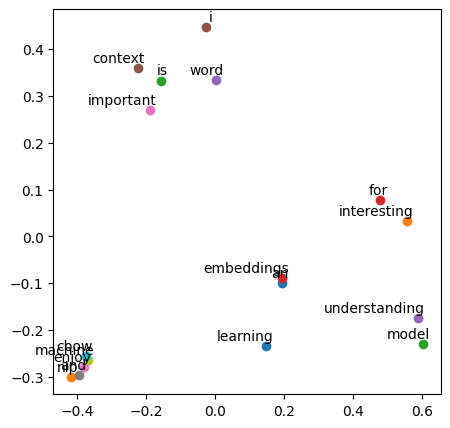

In [46]:
embeddings = model.get_weights()[0]

# Perform PCA to reduce the dimensionality
# of the embeddings
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

# Visualize the embeddings
plt.figure(figsize=(5, 5))
for i, word in enumerate(tokenizer.word_index.keys()):
    x, y = reduced_embeddings[i]
    plt.scatter(x, y)
    plt.annotate(word, xy=(x, y), xytext=(5, 2),
                 textcoords='offset points',
                 ha='right', va='bottom')
plt.show()